In [277]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [278]:
def mkdir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [279]:
indirs = ["3bulk", "xin", "pbmc"]
dfs = dict()
for indir in indirs:
    mkdir(os.path.join(indir, "figures"))
    df = pd.read_csv(os.path.join(indir, "losses.txt"), sep="\t", header=0)
    df["dropout"] = list(zip(df["distribution"].str.split("_").str[1], df["distribution"].str.split("_").apply(len) == 3))
    df["model"] = df["distribution"]
    df["distribution"] = df["distribution"].str.split("_").str[0]
    df = df.set_index("model").sort_index()
    dfs[indir] = df

In [280]:
def model_bars(df, var, y_label=None, title=None, log_y=True, figsize=(10, 6), dpi=100, path=None):
    f, ax = plt.subplots(figsize=figsize, dpi=dpi)

    width = 0.18

    dists = df["distribution"].unique().tolist()
    n_distributions = len(dists)

    model_variations = df["dropout"].unique().tolist()

    x = np.arange(n_distributions)

    for i, variation in enumerate(model_variations):
        offset = i * width
        rects = ax.bar(x + offset, df[df["dropout"] == variation][var], width, label="_".join(str(e).lower() for e in variation))
        # ax.bar_label(rects, fmt="%.1e", rotation=45, padding=3)


    ax.legend(loc='upper left', ncols=5, bbox_to_anchor=(0, 1.1))
    ax.set_xticks(x + width * 2, dists)
    if log_y:
        ax.set_yscale("log")

    if y_label is not None:
        ax.set_ylabel(y_label)

    ax.set_xlabel(indir)

    if title is not None:
        ax.set_title(title, bbox_to_anchor=(0.5, 1.1))

    if path is not None:
        plt.savefig(path, bbox_inches="tight")
    plt.show()

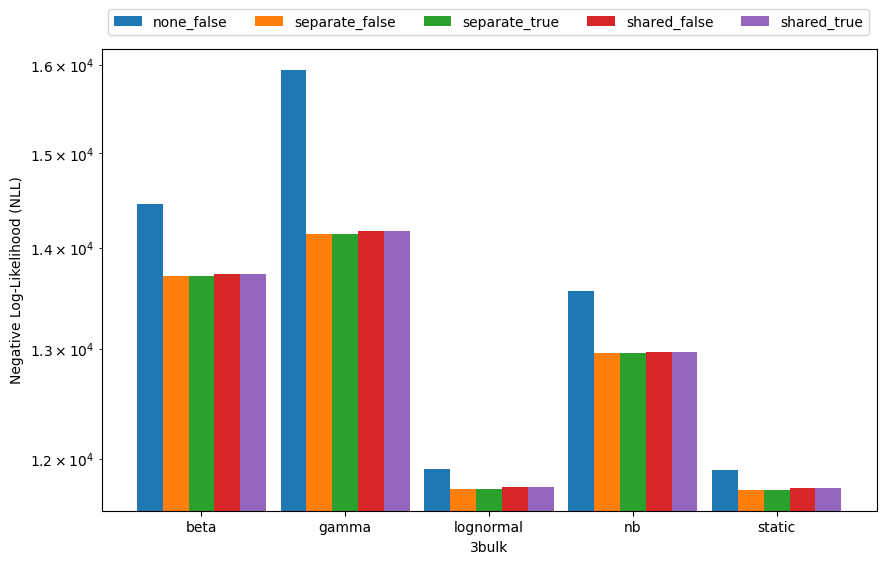

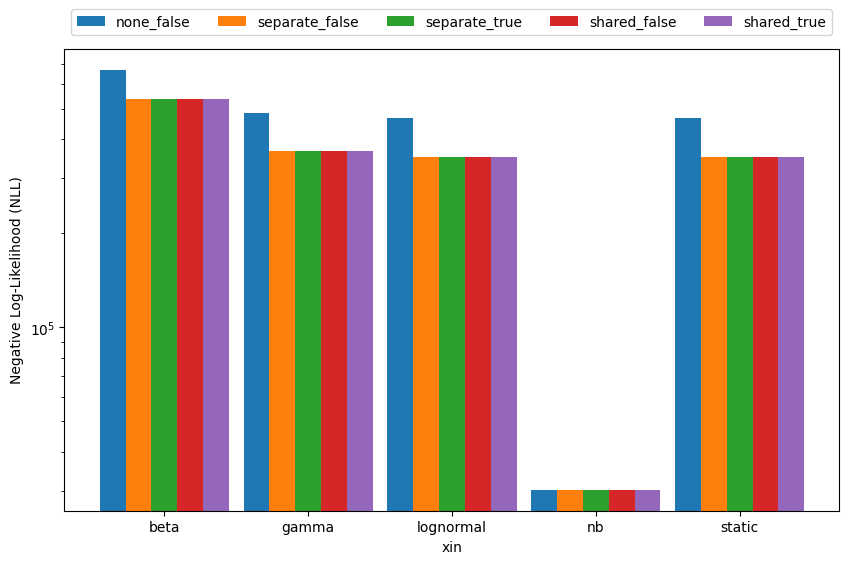

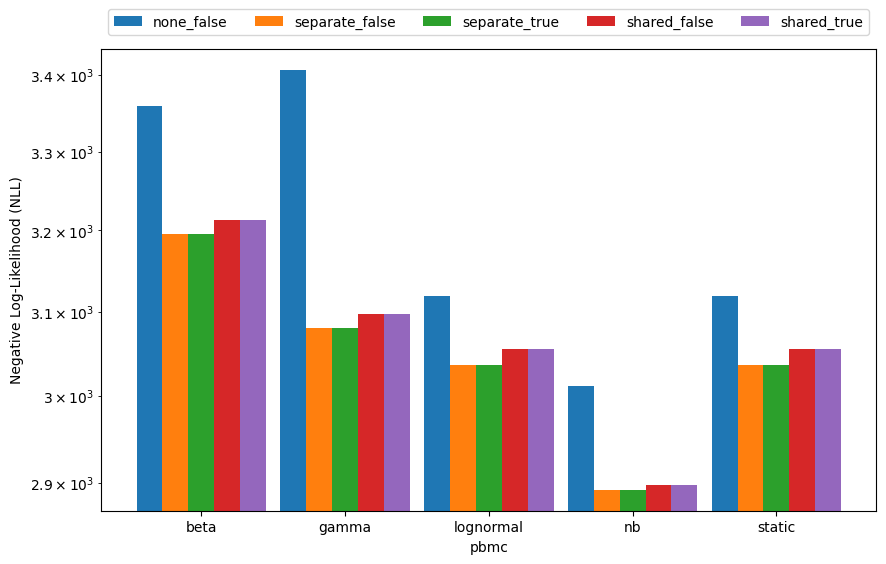

In [281]:
for indir in indirs:
    model_bars(dfs[indir], "ref_nll_loss", y_label="Negative Log-Likelihood (NLL)", log_y=True, path=os.path.join(indir, "figures", "ref_nll_bars.pdf"))


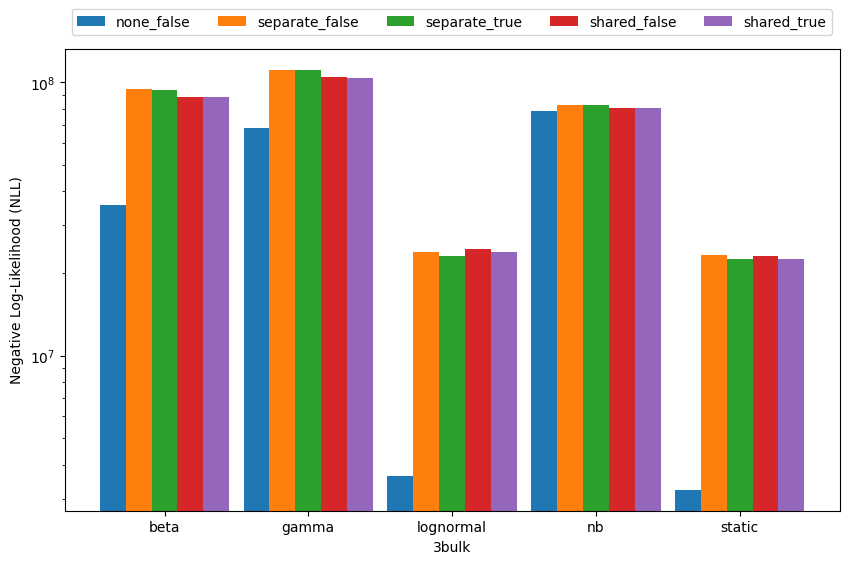

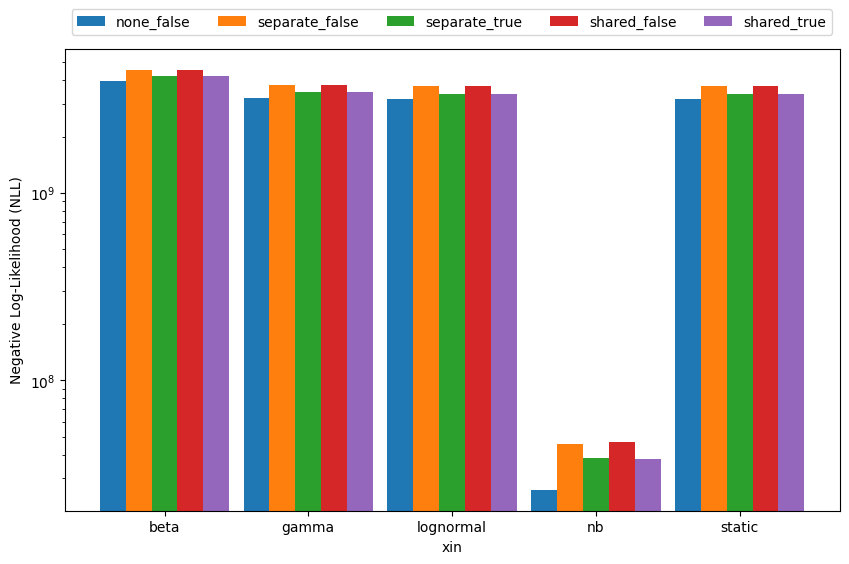

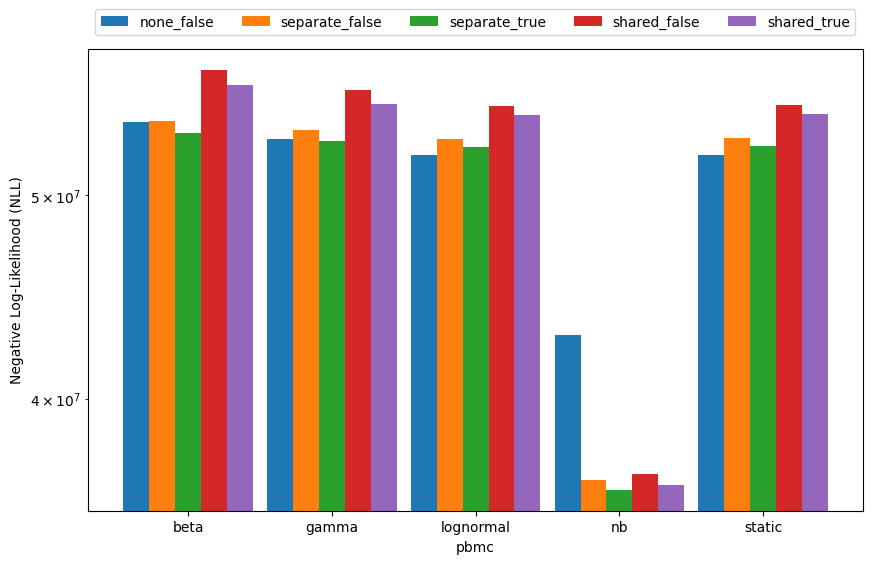

In [282]:
for indir in indirs:
    model_bars(dfs[indir], "deconv_nll_loss", y_label="Negative Log-Likelihood (NLL)", log_y=True, path=os.path.join(indir, "figures", "dec_nll_bars.pdf"))

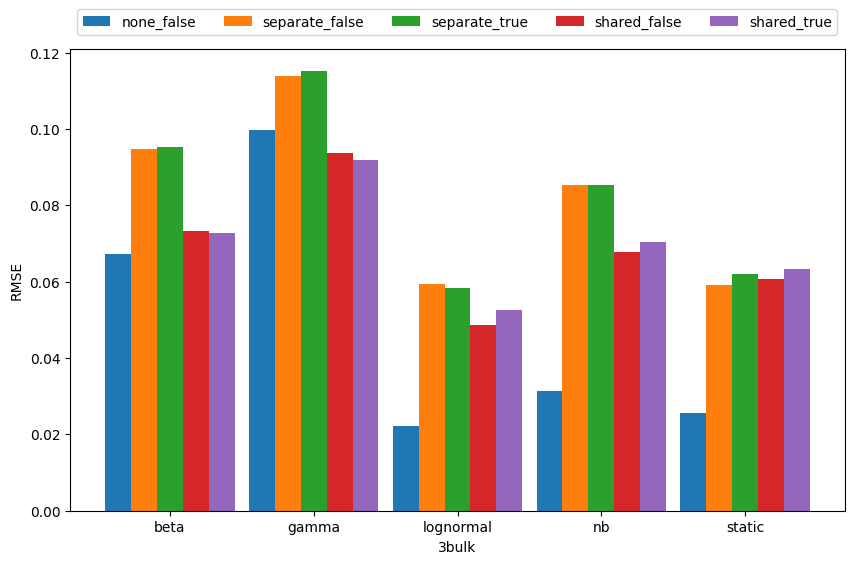

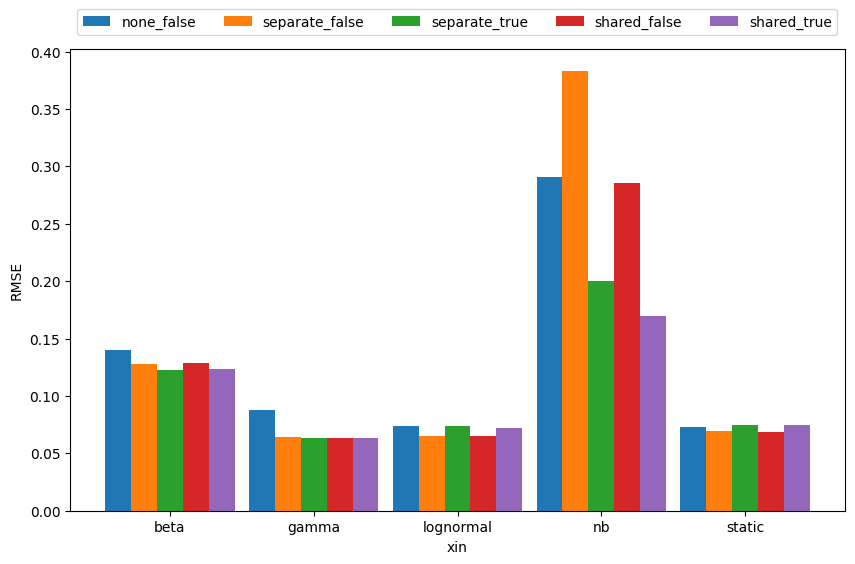

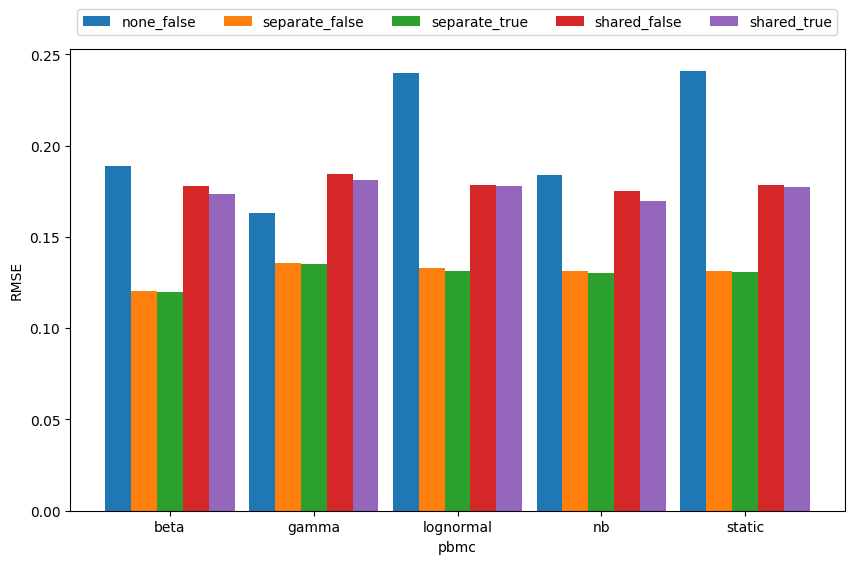

In [283]:
for indir in indirs:
    model_bars(dfs[indir], "rmse", y_label="RMSE", log_y=False, path=os.path.join(indir, "figures", "rmse_bars.pdf"))

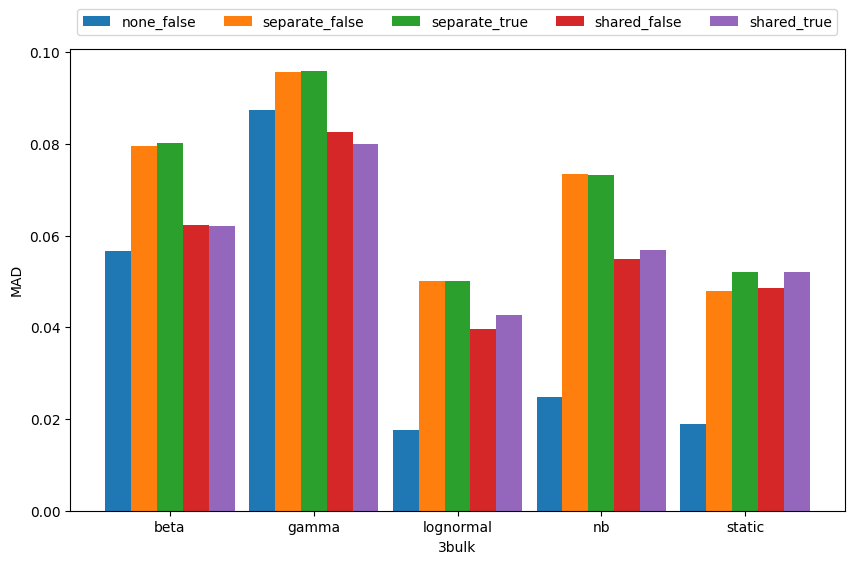

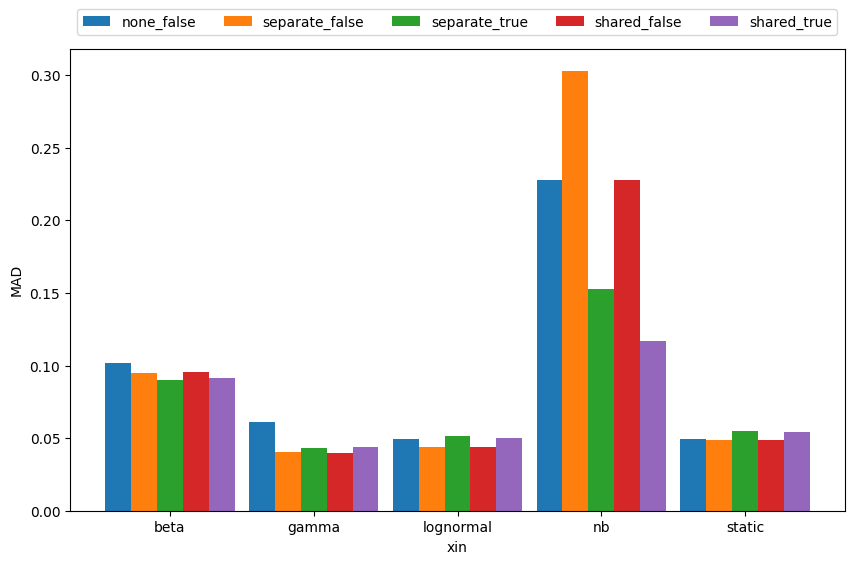

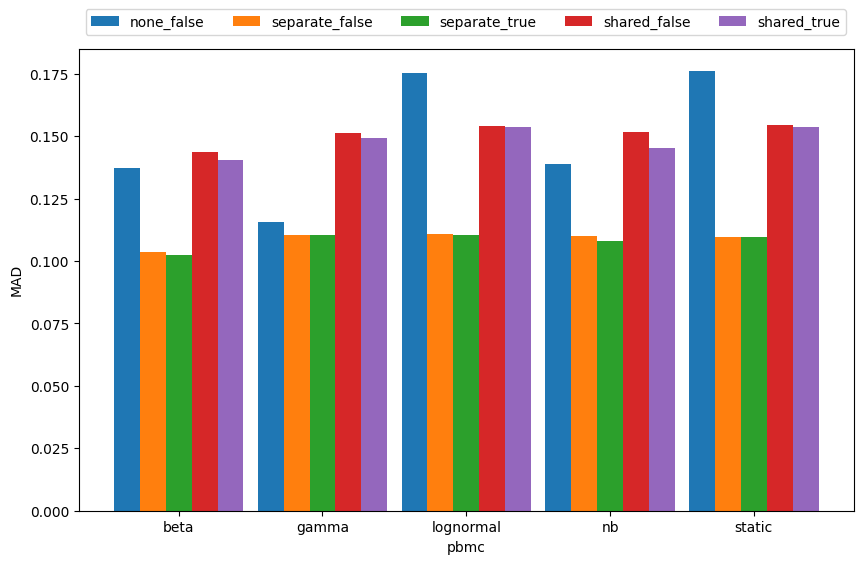

In [284]:
for indir in indirs:
    model_bars(dfs[indir], "mad", y_label="MAD", log_y=False, path=os.path.join(indir, "figures", "mad_bars.pdf"))

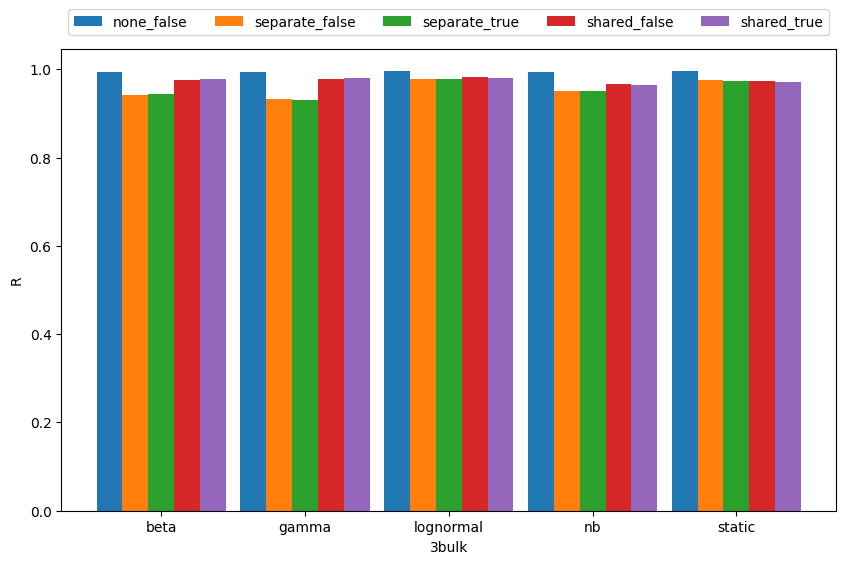

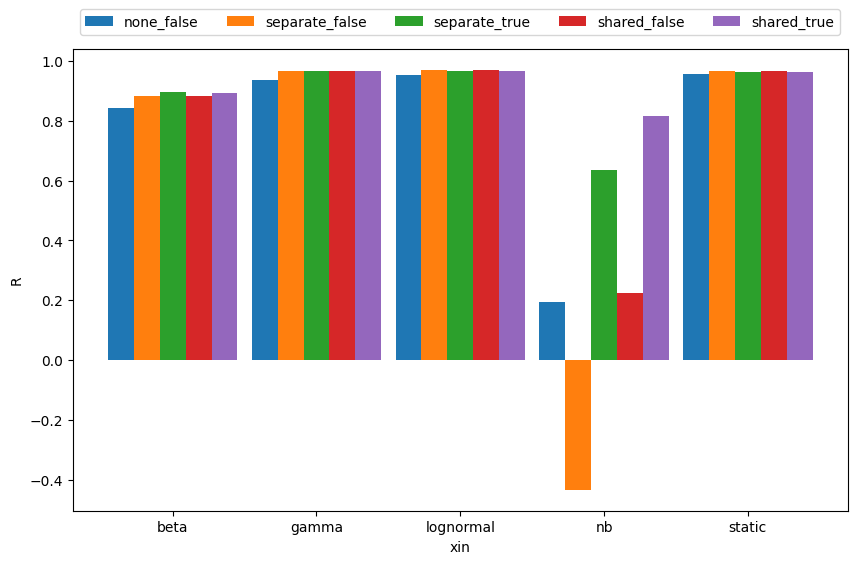

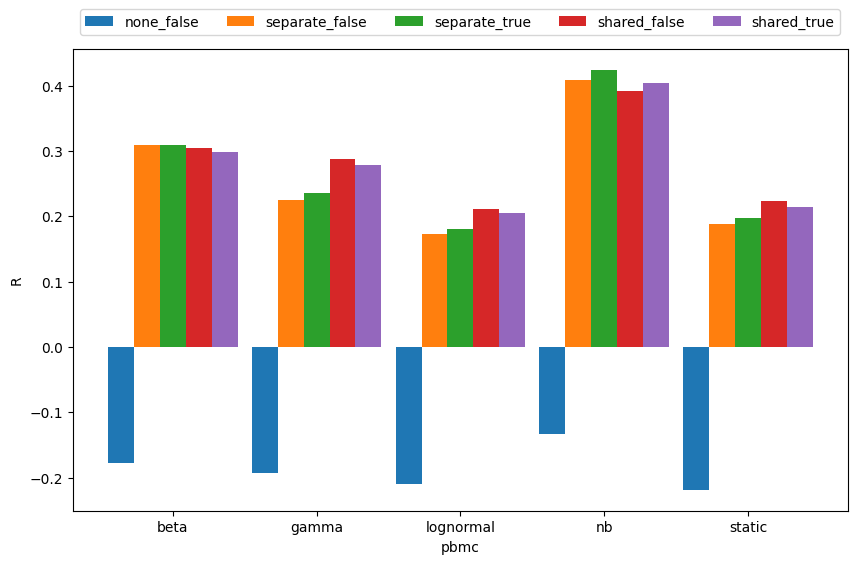

In [285]:
for indir in indirs:
    model_bars(dfs[indir], "r", y_label="R", log_y=False, path=os.path.join(indir, "figures", "r_bars.pdf"))

In [286]:
def var_plot(dfs, vars, title=None, argsort=True, figsize=(10, 5), dpi=120):
    f, ax = plt.subplots(ncols=2, nrows=len(vars), figsize=(figsize[0], figsize[1] * len(vars)), dpi=dpi)
    n_models = dfs[list(dfs.keys())[0]].shape[0]
    n_datasets = len(dfs)
    x = np.arange(n_datasets)
    y = np.arange(n_models)
    vals = np.empty((n_datasets, n_models), dtype=float)
    order = np.empty((n_datasets, n_models), dtype=int)

    for row, var in enumerate(vars):
        for i, indir in enumerate(indirs):
            order[i,:] = dfs[indir][var].argsort()

            # for val in vals[i,:]:
            #     if i == 0:
            #         xx = -0.1
            #     elif i == n_datasets - 1:
            #         xx = n_datasets -0.9
            #     else:
            #         xx = i
            #     ax[0, row].text(xx, val, f"{dfs[indir][var][int(val)]:.2f}", ha="center", va="center", fontsize=8)

            vals[i,:] = dfs[indir][var]


        temp = pd.DataFrame(vals, index=indirs, columns=dfs[list(dfs.keys())[0]].index)
        sns.lineplot(temp, ax=ax[row, 0], palette="tab20")
        temp = pd.DataFrame(order, index=indirs, columns=dfs[list(dfs.keys())[0]].index)
        sns.lineplot(temp, ax=ax[row, 1], palette="tab20")
        
        # ax[row, 1].yaxis.tick_right()
        ax[row, 1].set_yticks([])
        # ax[row, 1].set_yticks(y, dfs[list(dfs.keys())[0]].index)
        ax[row, 1].set_xticks(x, indirs)
        
        # legend = ax[0, row].legend(loc='upper right', ncols=1, bbox_to_anchor=(1.45, 1))
        
        ax[row, 0].get_legend().remove()
        ax[row, 1].get_legend().remove()

            
        ax[row, 0].set_xlim(-0.2, n_datasets - 0.8)
        ax[row, 1].set_xlim(-0.2, n_datasets - 0.8)

        # if title is not None:
        #     ax.set_title(title)

    plt.show()

In [287]:
def var_plot(dfs, var, title=None, argsort=True, figsize=(7, 7), dpi=100, path=None):
    f, ax = plt.subplots(figsize=figsize, dpi=dpi)
    n_models = dfs[list(dfs.keys())[0]].shape[0]
    n_datasets = len(dfs)
    x = np.arange(n_datasets)
    y = np.arange(n_models)
    vals = np.empty((n_datasets, n_models), dtype=float)

    for i, indir in enumerate(indirs):
        if argsort:
            vals[i,:] = dfs[indir][var].argsort()

            for val in vals[i,:]:
                if i == 0:
                    xx = -0.1
                elif i == n_datasets - 1:
                    xx = n_datasets -0.9
                else:
                    xx = i
                ax.text(xx, val, f"{dfs[indir][var][int(val)]:.2f}", ha="center", va="center", fontsize=8)
        else:
            vals[i,:] = dfs[indir][var]


    temp = pd.DataFrame(vals, index=indirs, columns=dfs[list(dfs.keys())[0]].index)
    sns.lineplot(temp, ax=ax, palette="tab20")
    ax.set_xticks(x, indirs)
    legend = ax.legend(loc='upper right', ncols=1, bbox_to_anchor=(1.45, 1))

    if argsort:
        legend.remove()
        ax.set_yticks(y, dfs[indir].index)
        
    ax.set_xlim(-0.2, n_datasets - 0.8)

    if title is not None:
        ax.set_title(title)

    if path is not None:
        plt.savefig(path, bbox_inches="tight")

        
    plt.show()



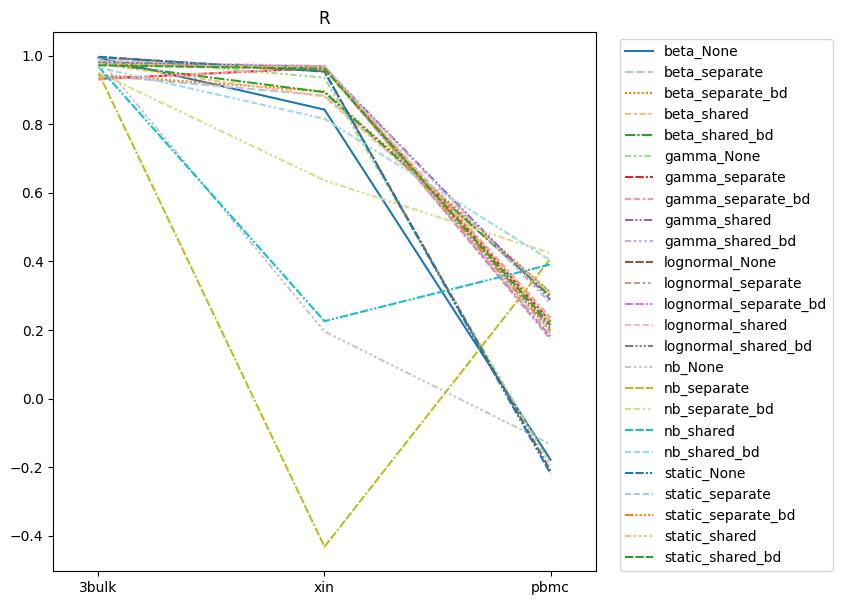

In [288]:
var_plot(dfs, "r", title="R", argsort=False, path=os.path.join(indir, "figures", "r_line.pdf"))

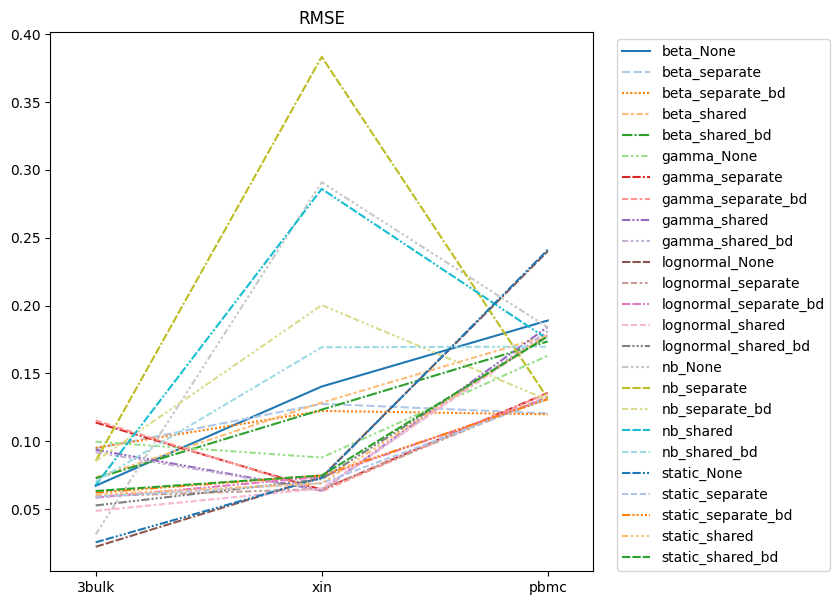

In [289]:
var_plot(dfs, "rmse", title="RMSE", argsort=False, path=os.path.join(indir, "figures", "rmse_line.pdf"))

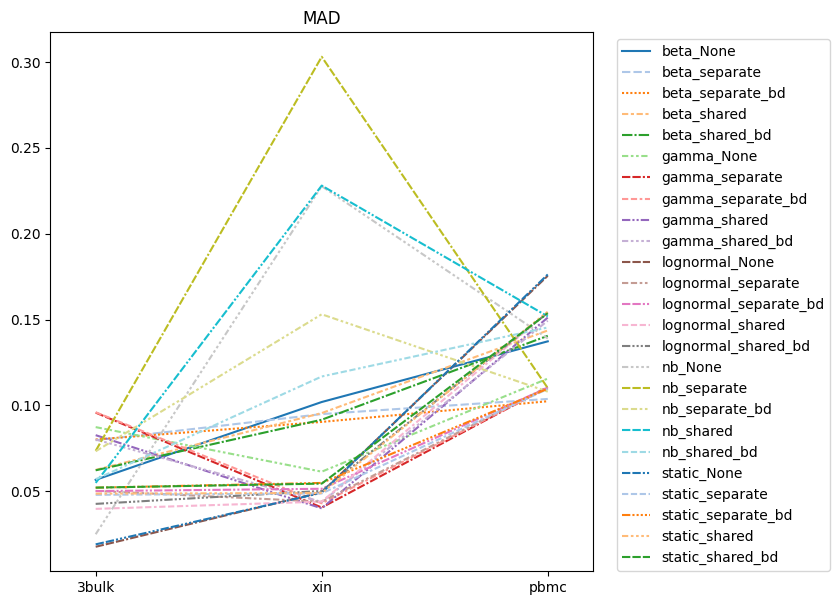

In [290]:
var_plot(dfs, "mad", title="MAD", argsort=False, path=os.path.join(indir, "figures", "mad_line.pdf"))